In [62]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

(-0.5, 222.5, 233.5, -0.5)

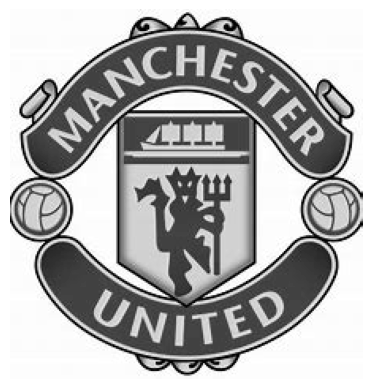

In [63]:
image = cv2.imread('assets/manchester_united.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.axis('off')

In [64]:
smoothFilter = np.array([[1/10, 1/10, 1/10], 
                        [1/10, 1/5, 1/10],
                        [1/10, 1/10, 1/10]])
sharpFilter = np.array([[1/9, 1/9, 1/9], 
                        [1/9, 8/9, 1/9],
                        [1/9, 1/9, 1/9]])

In [65]:
kernel_3x3 = np.ones((3,3)) / 9
kernel_9x9 = np.ones((9,9)) / 81

In [66]:
mean3x3 = cv2.filter2D(image, -1, kernel_3x3)
mean9x9 = cv2.filter2D(image, -1, kernel_9x9)

median3x3 = cv2.medianBlur(image, 3)
median9x9 = cv2.medianBlur(image, 9)

def modus_filter(image, kernel_size):
    filtered_image = np.zeros_like(image)
    for i in range(kernel_size//2, image.shape[0]-kernel_size//2):
        for j in range(kernel_size//2, image.shape[1]-kernel_size//2):
            patch = image[i-kernel_size//2:i+kernel_size//2+1, j-kernel_size//2:j+kernel_size//2+1]
            values, counts = np.unique(patch, return_counts=True)
            filtered_image[i,j] = values[np.argmax(counts)]
    return filtered_image

modus3x3 = modus_filter(image, 3)
modus9x9 = modus_filter(image, 9)

smoothImg = cv2.filter2D(image, -1, smoothFilter)
sharpImg = cv2.filter2D(image, -1, sharpFilter)

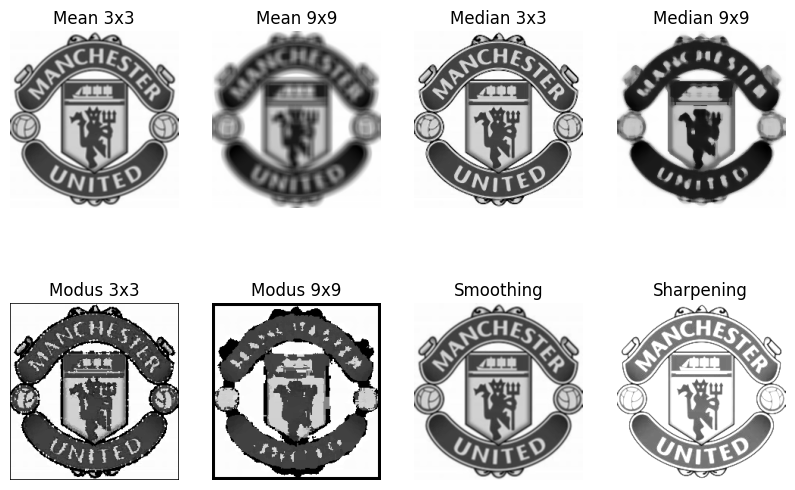

In [67]:
plt.figure(figsize=(10, 10))
plt.subplot(341)
plt.imshow(mean3x3, cmap='gray')
plt.title('Mean 3x3')
plt.axis("off")

plt.subplot(342)
plt.imshow(mean9x9, cmap='gray')
plt.title('Mean 9x9')
plt.axis("off")

plt.subplot(343)
plt.imshow(median3x3, cmap='gray')
plt.title('Median 3x3')
plt.axis("off")

plt.subplot(344)
plt.imshow(median9x9, cmap='gray')
plt.title('Median 9x9')
plt.axis("off")

plt.subplot(345)
plt.imshow(modus3x3, cmap='gray')
plt.title('Modus 3x3')
plt.axis("off")

plt.subplot(346)
plt.imshow(modus9x9, cmap='gray')
plt.title('Modus 9x9')
plt.axis("off")

plt.subplot(347)
plt.imshow(smoothImg, cmap='gray')
plt.title('Smoothing')
plt.axis("off")

plt.subplot(348)
plt.imshow(sharpImg, cmap='gray')
plt.title('Sharpening')
plt.axis("off")

plt.show()

In [68]:
def konvolusi(image, kernel):
    # Get image and kernel dimensions
    i_rows, i_cols = image.shape
    k_rows, k_cols = kernel.shape
    
    # Pad the image to handle borders
    pad_height = k_rows // 2
    pad_width = k_cols // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    # Initialize result image
    result = np.zeros_like(image)
    
    # Perform convolution
    for i in range(i_rows):
        for j in range(i_cols):
            # Extract the region of interest from the padded image
            region = padded_image[i:i + k_rows, j:j + k_cols]
            # Perform element-wise multiplication and sum
            result[i, j] = np.sum(region * kernel)
    
    return result

In [69]:
sobelKernelx = np.array([[-1, 0, 1], 
                   [-2, 0, 2],
                   [-1, 0, 1]])
sobelKernely = np.array([[1, 2, 1], 
                   [0, 0, 0], 
                   [-1, -2, -1]])

In [70]:
def sobel_operator(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.sqrt(sobelx**2 + sobely**2)
    return sobel

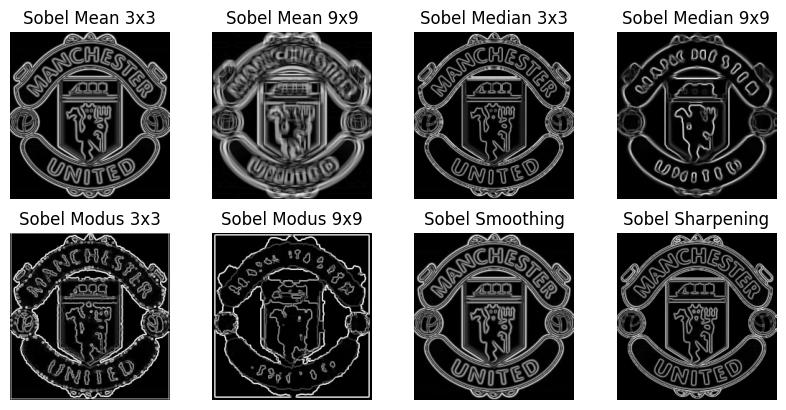

In [71]:
# Deteksi tepi dengan operator Prewitt
sobelMean3x3 = sobel_operator(mean3x3)
sobelMedian3x3 = sobel_operator(median3x3)
sobelModus3x3 = sobel_operator(modus3x3)
sobelMean9x9 = sobel_operator(mean9x9)
sobelMedian9x9 = sobel_operator(median9x9)
sobelModus9x9 = sobel_operator(modus9x9)
sobelSmooth = sobel_operator(smoothImg)
sobelSharp = sobel_operator(sharpImg)

plt.figure(figsize=(10, 10))
plt.subplot(441)
plt.imshow(sobelMean3x3, cmap='gray')
plt.title('Sobel Mean 3x3')
plt.axis("off")

plt.subplot(442)
plt.imshow(sobelMean9x9, cmap='gray')
plt.title('Sobel Mean 9x9')
plt.axis("off")

plt.subplot(443)
plt.imshow(sobelMedian3x3, cmap='gray')
plt.title('Sobel Median 3x3')
plt.axis("off")

plt.subplot(444)
plt.imshow(sobelMedian9x9, cmap='gray')
plt.title('Sobel Median 9x9')
plt.axis("off")

plt.subplot(445)
plt.imshow(sobelModus3x3, cmap='gray')
plt.title('Sobel Modus 3x3')
plt.axis("off")

plt.subplot(446)
plt.imshow(sobelModus9x9, cmap='gray')
plt.title('Sobel Modus 9x9')
plt.axis("off")

plt.subplot(447)
plt.imshow(sobelSmooth, cmap='gray')
plt.title('Sobel Smoothing')
plt.axis("off")

plt.subplot(448)
plt.imshow(sobelSharp, cmap='gray')
plt.title('Sobel Sharpening')
plt.axis("off")

plt.show()


In [72]:
PrewittKernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
PrewittKernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

In [73]:
def prewitt_operator(image):
    # Konvolusi dengan operator Prewitt
    prewittx = cv2.filter2D(image, -1, PrewittKernelx)
    prewitty = cv2.filter2D(image, -1, PrewittKernely)
    prewitt = np.sqrt(prewittx**2 + prewitty**2)
    return prewitt

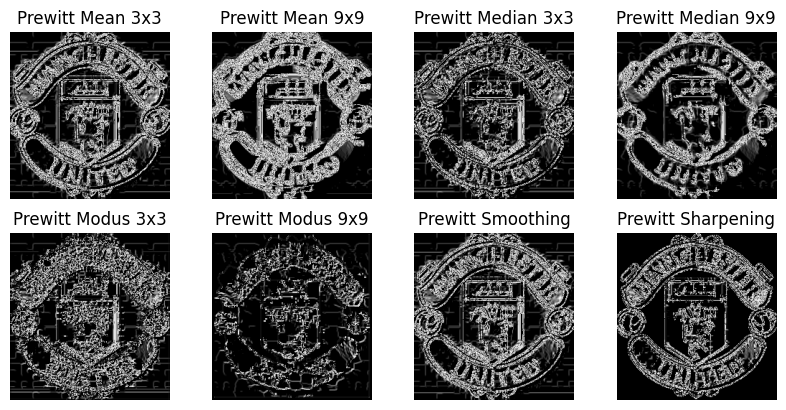

In [74]:
# Deteksi tepi dengan operator Prewitt
prewittMean3x3 = prewitt_operator(mean3x3)
prewittMedian3x3 = prewitt_operator(median3x3)
prewittModus3x3 = prewitt_operator(modus3x3)
prewittMean9x9 = prewitt_operator(mean9x9)
prewittMedian9x9 = prewitt_operator(median9x9)
prewittModus9x9 = prewitt_operator(modus9x9)
prewittSmooth = prewitt_operator(smoothImg)
prewittSharp = prewitt_operator(sharpImg)

plt.figure(figsize=(10, 10))
plt.subplot(441)
plt.imshow(prewittMean3x3, cmap='gray')
plt.title('Prewitt Mean 3x3')
plt.axis("off")

plt.subplot(442)
plt.imshow(prewittMean9x9, cmap='gray')
plt.title('Prewitt Mean 9x9')
plt.axis("off")

plt.subplot(443)
plt.imshow(prewittMedian3x3, cmap='gray')
plt.title('Prewitt Median 3x3')
plt.axis("off")

plt.subplot(444)
plt.imshow(prewittMedian9x9, cmap='gray')
plt.title('Prewitt Median 9x9')
plt.axis("off")

plt.subplot(445)
plt.imshow(prewittModus3x3, cmap='gray')
plt.title('Prewitt Modus 3x3')
plt.axis("off")

plt.subplot(446)
plt.imshow(prewittModus9x9, cmap='gray')
plt.title('Prewitt Modus 9x9')
plt.axis("off")

plt.subplot(447)
plt.imshow(prewittSmooth, cmap='gray')
plt.title('Prewitt Smoothing')
plt.axis("off")

plt.subplot(448)
plt.imshow(prewittSharp, cmap='gray')
plt.title('Prewitt Sharpening')
plt.axis("off")

plt.show()

In [75]:
robertKernelx = np.array([[1, 0], [0, -1]])
robertKernely = np.array([[0, 1], [-1, 0]])

In [76]:
def robert_operator(image):
    # Konvolusi dengan operator Robert
    robertx = cv2.filter2D(image, -1, robertKernelx)
    roberty = cv2.filter2D(image, -1, robertKernely)
    robert = np.sqrt(robertx**2 + roberty**2)
    return robert

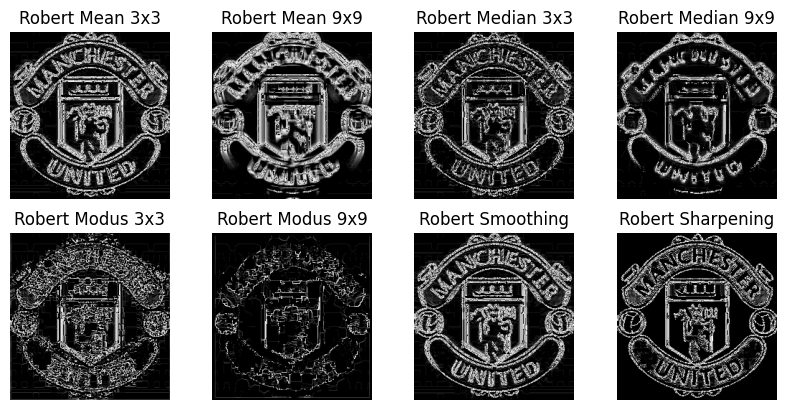

In [77]:
# Deteksi tepi dengan operator Prewitt
robertMean3x3 = robert_operator(mean3x3)
robertMedian3x3 = robert_operator(median3x3)
robertModus3x3 = robert_operator(modus3x3)
robertMean9x9 = robert_operator(mean9x9)
robertMedian9x9 = robert_operator(median9x9)
robertModus9x9 = robert_operator(modus9x9)
robertSmooth = robert_operator(smoothImg)
robertSharp = robert_operator(sharpImg)

plt.figure(figsize=(10, 10))
plt.subplot(441)
plt.imshow(robertMean3x3, cmap='gray')
plt.title('Robert Mean 3x3')
plt.axis("off")

plt.subplot(442)
plt.imshow(robertMean9x9, cmap='gray')
plt.title('Robert Mean 9x9')
plt.axis("off")

plt.subplot(443)
plt.imshow(robertMedian3x3, cmap='gray')
plt.title('Robert Median 3x3')
plt.axis("off")

plt.subplot(444)
plt.imshow(robertMedian9x9, cmap='gray')
plt.title('Robert Median 9x9')
plt.axis("off")

plt.subplot(445)
plt.imshow(robertModus3x3, cmap='gray')
plt.title('Robert Modus 3x3')
plt.axis("off")

plt.subplot(446)
plt.imshow(robertModus9x9, cmap='gray')
plt.title('Robert Modus 9x9')
plt.axis("off")

plt.subplot(447)
plt.imshow(robertSmooth, cmap='gray')
plt.title('Robert Smoothing')
plt.axis("off")

plt.subplot(448)
plt.imshow(robertSharp, cmap='gray')
plt.title('Robert Sharpening')
plt.axis("off")

plt.show()